In [8]:
import numpy as np

import pyabc
from pyabc import Distribution, RV, ABCSMC


def model(p):
    return {'ss1': p['theta'] + 1 + 1 * np.random.normal(),
            'ss2': 2 + 0.01 * np.random.normal()}

# true model parameter
refval = {'theta': 3}

# observed summary statistics
obs = {'ss1': refval['theta'] + 1, 'ss2': 2}

# prior distribution
prior = pyabc.Distribution(theta=pyabc.RV('uniform', 0, 10))

distances = [
    pyabc.PNormDistance(),
    pyabc.AdaptivePNormDistance(adaptive=False, scale_function=pyabc.distance.median_absolute_deviation),
    pyabc.AdaptivePNormDistance(adaptive=True, scale_function=pyabc.distance.median_absolute_deviation),
    pyabc.PNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=False, normalize_labels=False)),
    pyabc.PNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=True, normalize_labels=False)),
    pyabc.PNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=True, normalize_labels=True)),
    pyabc.AdaptivePNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=True, normalize_labels=False), adaptive=True),
    pyabc.AdaptivePNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=True, normalize_labels=False, n_fit=4), adaptive=True),
    pyabc.PNormDistance(sumstat=pyabc.GPPredictorSumstat()),
    pyabc.AdaptivePNormDistance(sumstat=pyabc.GPPredictorSumstat()),
    pyabc.PNormDistance(sumstat=pyabc.PredictorSumstat(predictor=pyabc.MLPPredictor())),
    pyabc.PNormDistance(sumstat=pyabc.PredictorSumstat(
        predictor=pyabc.ModelSelection(
            predictors=[pyabc.LinearPredictor(), pyabc.GPPredictor()]
        ),
        n_fit=1,
    )),pyabc.PNormDistance(sumstat=pyabc.PredictorSumstat(
        predictor=pyabc.ModelSelection(
            predictors=[pyabc.LinearPredictor(), pyabc.GPPredictor()]
        ),
        n_fit=4,
    )),
    pyabc.distance.InfoWeightedPNormDistance(predictor=pyabc.ModelSelection(
            predictors=[pyabc.LinearPredictor()]
        ),
        n_fit=1,
    ),
    pyabc.distance.InfoWeightedPNormDistance(predictor=pyabc.ModelSelection(
            predictors=[pyabc.LinearPredictor()]
        ),
        n_fit=4,
    ),
]

labels = [
    'Euclidean',
    'Calibrated Euclidean',
    'Adaptive Euclidean',
    'Learned linear nn',
    'Learned linear tn',
    'Learned linear tt',
    'Adaptive + LL tn',
    'Adaptive + LL tn n_fit=4',
    'GP',
    'Adaptive GP',
    'MLP',
    'Model selection',
    'Model selection n_fit=4',
    'Info weighted ms',
    'Info weighted ms n_fit=4',
]

def plot_history(history: pyabc.History, label: str):
    fig, ax = plt.subplots(1,1)
    ax
    for t in range(history.max_t + 1):
        df, w = history.get_distribution(m=0, t=t)
        pyabc.visualization.plot_kde_1d(df, w, xmin=0, xmax=10, numx=300, refval=refval,
                                        x='theta', xname="$\theta$", ax=ax,
                                        label="PDF t={}".format(t))
    ax.axvline(0, color='k', linestyle='dashed', label="True value")
    ax.legend()
    ax.set_title(label)

In [9]:
hs = []

for distance, label in zip(distances, labels):
    print(label)
    abc = ABCSMC(model, prior, distance, population_size=100)
    abc.new(pyabc.create_sqlite_db_id(), obs)
    h = abc.run(max_total_nr_simulations=1e4)
    hs.append(h)

INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=226, start_time=2021-03-29 10:26:04.015957>
INFO:ABC:Calibration sample t=-1.


Euclidean


INFO:Epsilon:initial epsilon is 2.960169679828435
INFO:ABC:t: 0, eps: 2.960169679828435.
INFO:ABC:Acceptance rate: 100 / 190 = 5.2632e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.696664517228206.
INFO:ABC:Acceptance rate: 100 / 178 = 5.6180e-01, ESS=9.8873e+01.
INFO:ABC:t: 2, eps: 0.9188553232542859.
INFO:ABC:Acceptance rate: 100 / 274 = 3.6496e-01, ESS=9.4085e+01.
INFO:ABC:t: 3, eps: 0.45040862563173767.
INFO:ABC:Acceptance rate: 100 / 507 = 1.9724e-01, ESS=8.5506e+01.
INFO:ABC:t: 4, eps: 0.19138611131303693.
INFO:ABC:Acceptance rate: 100 / 998 = 1.0020e-01, ESS=8.3933e+01.
INFO:ABC:t: 5, eps: 0.10544266441678307.
INFO:ABC:Acceptance rate: 100 / 1633 = 6.1237e-02, ESS=9.0835e+01.
INFO:ABC:t: 6, eps: 0.05821461228112429.
INFO:ABC:Acceptance rate: 100 / 3134 = 3.1908e-02, ESS=1.9329e+01.
INFO:ABC:t: 7, eps: 0.0279804819953061.
INFO:ABC:Acceptance rate: 100 / 9984 = 1.0016e-02, ESS=7.8861e+01.
INFO:pyabc.util:Stopping: total simulations budget.
INFO:History:Done <ABCSMC id=226, duration=0:

Calibrated Euclidean


INFO:History:Start <ABCSMC id=227, start_time=2021-03-29 10:26:26.320288>
INFO:ABC:Calibration sample t=-1.
INFO:Epsilon:initial epsilon is 1.7268577394963833
INFO:ABC:t: 0, eps: 1.7268577394963833.
INFO:ABC:Acceptance rate: 100 / 239 = 4.1841e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.126774177036947.
INFO:ABC:Acceptance rate: 100 / 284 = 3.5211e-01, ESS=9.4438e+01.
INFO:ABC:t: 2, eps: 0.7427404987855315.
INFO:ABC:Acceptance rate: 100 / 559 = 1.7889e-01, ESS=8.7805e+01.
INFO:ABC:t: 3, eps: 0.549152380575419.
INFO:ABC:Acceptance rate: 100 / 942 = 1.0616e-01, ESS=7.8395e+01.
INFO:ABC:t: 4, eps: 0.3862620162488872.
INFO:ABC:Acceptance rate: 100 / 1477 = 6.7705e-02, ESS=8.0559e+01.
INFO:ABC:t: 5, eps: 0.2737461660049623.
INFO:ABC:Acceptance rate: 100 / 2869 = 3.4855e-02, ESS=8.2034e+01.
INFO:ABC:t: 6, eps: 0.2082753988418561.
INFO:ABC:Acceptance rate: 100 / 3938 = 2.5394e-02, ESS=7.9796e+01.
INFO:pyabc.util:Stopping: total simulations budget.
INFO:History:Done <ABCSMC id=227, duration=0:0

Adaptive Euclidean


INFO:Epsilon:initial epsilon is 1.825775620377801
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 1.825775620377801.
INFO:ABC:Acceptance rate: 100 / 216 = 4.6296e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.0524704916244194.
INFO:ABC:Acceptance rate: 100 / 333 = 3.0030e-01, ESS=9.6472e+01.
INFO:ABC:t: 2, eps: 0.8816903508148872.
INFO:ABC:Acceptance rate: 100 / 485 = 2.0619e-01, ESS=8.5395e+01.
INFO:ABC:t: 3, eps: 0.7505883925089873.
INFO:ABC:Acceptance rate: 100 / 899 = 1.1123e-01, ESS=8.8655e+01.
INFO:ABC:t: 4, eps: 0.5588170587589958.
INFO:ABC:Acceptance rate: 100 / 1269 = 7.8802e-02, ESS=8.6020e+01.
INFO:ABC:t: 5, eps: 0.4006695206997151.
INFO:ABC:Acceptance rate: 100 / 2664 = 3.7538e-02, ESS=6.2962e+01.
INFO:ABC:t: 6, eps: 0.2728435701454306.
INFO:ABC:Acceptance rate: 100 / 5688 = 1.7581e-02, ESS=8.6263e+01.
INFO:pyabc.util:Stopping: total simulations budget.
INFO:History:Done <ABCSMC id=228, duration=0:00:15.938456, end_time=2021-03-29 10:26:58.533048>
IN

Learned linear nn


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 2.2019340989785476
INFO:ABC:t: 0, eps: 2.2019340989785476.
INFO:ABC:Acceptance rate: 100 / 223 = 4.4843e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.1904139999531116.
INFO:ABC:Acceptance rate: 100 / 267 = 3.7453e-01, ESS=9.1081e+01.
INFO:ABC:t: 2, eps: 0.541125983279113.
INFO:ABC:Acceptance rate: 100 / 400 = 2.5000e-01, ESS=9.5815e+01.
INFO:ABC:t: 3, eps: 0.3224318505376478.
INFO:ABC:Acceptance rate: 100 / 582 = 1.7182e-01, ESS=7.2460e+01.
INFO:ABC:t: 4, eps: 0.17590909372641553.
INFO:ABC:Acceptance rate: 100 / 1145 = 8.7336e-02, ESS=9.2690e+01.
INFO:ABC:t: 5, eps: 0.09196906012551907.
INFO:ABC:Acceptance rate: 100 / 2016 = 4.9603e-02, ESS=7.0970e+01.
INFO:ABC:t: 6, eps: 0.032839623088616376.
INFO:ABC:Acceptance rate: 100 / 5470 = 1.8282e-02, ESS=7.9763e+01.
INFO:pyabc.util:Stopping: total simulations budget.
INFO:History:Done <ABCSMC id=229, duration=0:00:14.465799, end_time=2021-03-29 10:27:13.060344>
INFO:Sampler:Pa

Learned linear tn


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 1.969614237991778
INFO:ABC:t: 0, eps: 1.969614237991778.
INFO:ABC:Acceptance rate: 100 / 220 = 4.5455e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.0588360520694924.
INFO:ABC:Acceptance rate: 100 / 240 = 4.1667e-01, ESS=9.8596e+01.
INFO:ABC:t: 2, eps: 0.49295612077335055.
INFO:ABC:Acceptance rate: 100 / 335 = 2.9851e-01, ESS=8.9944e+01.
INFO:ABC:t: 3, eps: 0.24623375581303167.
INFO:ABC:Acceptance rate: 100 / 689 = 1.4514e-01, ESS=6.2291e+01.
INFO:ABC:t: 4, eps: 0.14615814163500815.
INFO:ABC:Acceptance rate: 100 / 1072 = 9.3284e-02, ESS=8.2535e+01.
INFO:ABC:t: 5, eps: 0.06448960527413236.
INFO:ABC:Acceptance rate: 100 / 2685 = 3.7244e-02, ESS=6.3703e+01.
INFO:ABC:t: 6, eps: 0.030155344962249715.
INFO:ABC:Acceptance rate: 100 / 5331 = 1.8758e-02, ESS=5.9693e+01.
INFO:pyabc.util:Stopping: total simulations budget.
INFO:History:Done <ABCSMC id=230, duration=0:00:14.799183, end_time=2021-03-29 10:27:27.901638>
INFO:Sampler:P

Learned linear tt


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 0.7267871730185552
INFO:ABC:t: 0, eps: 0.7267871730185552.
INFO:ABC:Acceptance rate: 100 / 207 = 4.8309e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.4008366839760007.
INFO:ABC:Acceptance rate: 100 / 215 = 4.6512e-01, ESS=8.2708e+01.
INFO:ABC:t: 2, eps: 0.17867159362428872.
INFO:ABC:Acceptance rate: 100 / 335 = 2.9851e-01, ESS=7.8909e+01.
INFO:ABC:t: 3, eps: 0.09235620898481256.
INFO:ABC:Acceptance rate: 100 / 630 = 1.5873e-01, ESS=7.2393e+01.
INFO:ABC:t: 4, eps: 0.040831411035613954.
INFO:ABC:Acceptance rate: 100 / 1336 = 7.4850e-02, ESS=9.5207e+01.
INFO:ABC:t: 5, eps: 0.018964842710005418.
INFO:ABC:Acceptance rate: 100 / 2750 = 3.6364e-02, ESS=8.4817e+01.
INFO:ABC:t: 6, eps: 0.010794802687886488.
INFO:ABC:Acceptance rate: 100 / 5671 = 1.7634e-02, ESS=8.4866e+01.
INFO:pyabc.util:Stopping: total simulations budget.
INFO:History:Done <ABCSMC id=231, duration=0:00:13.597664, end_time=2021-03-29 10:27:41.540375>
INFO:Sampl

Adaptive + LL tn


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 0.9203176583734808
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 0.9203176583734808.
INFO:ABC:Acceptance rate: 100 / 198 = 5.0505e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.527920108647018.
INFO:ABC:Acceptance rate: 100 / 181 = 5.5249e-01, ESS=9.8663e+01.
INFO:ABC:t: 2, eps: 0.3475986988684593.
INFO:ABC:Acceptance rate: 100 / 299 = 3.3445e-01, ESS=3.9949e+01.
INFO:ABC:t: 3, eps: 0.21275380451169223.
INFO:ABC:Acceptance rate: 100 / 626 = 1.5974e-01, ESS=9.2052e+01.
INFO:ABC:t: 4, eps: 0.10544107013164748.
INFO:ABC:Acceptance rate: 100 / 1204 = 8.3056e-02, ESS=3.0522e+01.
INFO:ABC:t: 5, eps: 0.03891971208975016.
INFO:ABC:Acceptance rate: 100 / 4007 = 2.4956e-02, ESS=8.9593e+01.
INFO:ABC:t: 6, eps: 0.01833595508581442.
INFO:ABC:Acceptance rate: 100 / 6237 = 1.6033e-02, ESS=8.7994e+01.
INFO:pyabc.util:Stopping: total simulations budget.
INFO:History:Done <ABCSMC id=232, duration=0:00:16.2876

Adaptive + LL tn n_fit=4


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 0.7825180929766063
INFO:Population:Recording also rejected particles: True
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 0.7825180929766063.
INFO:ABC:Acceptance rate: 100 / 220 = 4.5455e-01, ESS=1.0000e+02.
INFO:Predictor:Fitted LinearPredictor
INFO:ABC:t: 1, eps: 0.47479992591453224.
INFO:ABC:Acceptance rate: 100 / 214 = 4.6729e-01, ESS=9.6930e+01.
INFO:Predictor:Fitted LinearPredictor
INFO:ABC:t: 2, eps: 0.3978713725985175.
INFO:ABC:Acceptance rate: 100 / 279 = 3.5842e-01, ESS=8.8552e+01.
INFO:Predictor:Fitted LinearPredictor
INFO:ABC:t: 3, eps: 0.23454144784377204.
INFO:ABC:Acceptance rate: 100 / 513 = 1.9493e-01, ESS=7.5263e+01.
INFO:ABC:t: 4, eps: 0.13560306932394017.
INFO:ABC:Acceptance rate: 100 / 947 = 1.0560e-01, ESS=9.0682e+01.
INFO:ABC:t: 5, eps: 0.06559354837063439.
INFO:ABC:Acceptance rate: 100 / 1893 = 5.2826e-02, ESS=6.6085e+01.
INFO:ABC:t: 6, eps: 0.03283002803622343.
INF

GP


INFO:Predictor:Fitted GPPredictor
INFO:Epsilon:initial epsilon is 0.8365747025306993
INFO:ABC:t: 0, eps: 0.8365747025306993.
INFO:ABC:Acceptance rate: 100 / 207 = 4.8309e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.3832937915500032.
INFO:ABC:Acceptance rate: 100 / 239 = 4.1841e-01, ESS=9.6436e+01.
INFO:ABC:t: 2, eps: 0.17850418898966497.
INFO:ABC:Acceptance rate: 100 / 362 = 2.7624e-01, ESS=9.1660e+01.
INFO:ABC:t: 3, eps: 0.07570571302793667.
INFO:ABC:Acceptance rate: 100 / 928 = 1.0776e-01, ESS=1.6932e+01.
INFO:ABC:t: 4, eps: 0.056462759508595674.
INFO:ABC:Acceptance rate: 100 / 1620 = 6.1728e-02, ESS=9.7923e+01.
INFO:ABC:t: 5, eps: 0.029139469975927087.
INFO:ABC:Acceptance rate: 100 / 1947 = 5.1361e-02, ESS=6.8658e+01.
INFO:ABC:t: 6, eps: 0.015673985890369065.
INFO:ABC:Acceptance rate: 100 / 4664 = 2.1441e-02, ESS=8.8404e+01.
INFO:pyabc.util:Stopping: total simulations budget.
INFO:History:Done <ABCSMC id=234, duration=0:00:15.062107, end_time=2021-03-29 10:28:34.987884>
INFO:Sampler:P

Adaptive GP


INFO:Predictor:Fitted GPPredictor
INFO:Epsilon:initial epsilon is 0.8667578539846672
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 0.8667578539846672.
INFO:ABC:Acceptance rate: 100 / 202 = 4.9505e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.43712731884068495.
INFO:ABC:Acceptance rate: 100 / 223 = 4.4843e-01, ESS=9.7056e+01.
INFO:ABC:t: 2, eps: 0.32755715245248435.
INFO:ABC:Acceptance rate: 100 / 312 = 3.2051e-01, ESS=8.4132e+01.
INFO:ABC:t: 3, eps: 0.15409917702417636.
INFO:ABC:Acceptance rate: 100 / 887 = 1.1274e-01, ESS=9.1768e+01.
INFO:ABC:t: 4, eps: 0.06579412431057106.
INFO:ABC:Acceptance rate: 100 / 1849 = 5.4083e-02, ESS=8.7261e+01.
INFO:ABC:t: 5, eps: 0.028557720453162547.
INFO:ABC:Acceptance rate: 100 / 4232 = 2.3629e-02, ESS=2.9248e+01.
INFO:ABC:t: 6, eps: 0.014953679810594386.
INFO:ABC:Acceptance rate: 100 / 12163 = 8.2217e-03, ESS=9.3673e+01.
INFO:pyabc.util:Stopping: total simulations budget.
INFO:History:Done <ABCSMC id=235, duration=0:00:27.28

MLP


/home/yannik/anaconda3/envs/env/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
INFO:Predictor:Fitted MLPPredictor
INFO:Epsilon:initial epsilon is 0.9224406557940354
INFO:ABC:t: 0, eps: 0.9224406557940354.
INFO:ABC:Acceptance rate: 100 / 183 = 5.4645e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.4763089431987754.
INFO:ABC:Acceptance rate: 100 / 225 = 4.4444e-01, ESS=9.5430e+01.
INFO:ABC:t: 2, eps: 0.2292712452624345.
INFO:ABC:Acceptance rate: 100 / 356 = 2.8090e-01, ESS=8.0642e+01.
INFO:ABC:t: 3, eps: 0.10627620733658538.
INFO:ABC:Acceptance rate: 100 / 632 = 1.5823e-01, ESS=9.2828e+01.
INFO:ABC:t: 4, eps: 0.05189731597174145.
INFO:ABC:Acceptance rate: 100 / 1087 = 9.1996e-02, ESS=5.6555e+01.
INFO:ABC:t: 5, eps: 0.026728416298883.
INFO:ABC:Acceptance rate: 100 / 2068 = 4.8356e-02, ESS=6.4943e+01.

Model selection


INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Score LinearPredictor: 1.60e+00
INFO:Predictor:Score GPPredictor: 1.55e+00
INFO:Predictor:Fitted GPPredictor
INFO:Epsilon:initial epsilon is 0.7077716752072556
INFO:ABC:t: 0, eps: 0.7077716752072556.
INFO:ABC:Acceptance rate: 100 / 233 = 4.2918e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.33161754782289404.
INFO:ABC:Acceptance rate: 100 / 249 = 4.0161e-01, ESS=9.5022e+01.
INFO:ABC:t: 2, eps: 0.17574555124792518.
INFO:ABC:Acceptance rate: 100 / 348 = 2.8736e-01, ESS=8.9873e+01.
INFO:ABC:t: 3, eps: 0.08918568034341194.
INFO:ABC:Acceptance rate: 100 / 601 = 1.6639e-01, ESS=8.2217e+01.
INFO:ABC:t: 4, eps: 0.0457271929596430

Model selection n_fit=4


INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Score LinearPredictor: 1.61e+00
INFO:Predictor:Score GPPredictor: 1.62e+00
INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 0.7711472256617165
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 0.7711472256617165.
INFO:ABC:Acceptance rate: 100 / 214 = 4.6729e-01, ESS=1.0000e+02.
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predic

Info weighted ms


INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Score LinearPredictor: 1.79e+00
INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 0.3230091143898562
INFO:ABC:t: 0, eps: 0.3230091143898562.
INFO:ABC:Acceptance rate: 100 / 177 = 5.6497e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.15979974746287795.
INFO:ABC:Acceptance rate: 100 / 199 = 5.0251e-01, ESS=9.9193e+01.
INFO:ABC:t: 2, eps: 0.0639558106445064.
INFO:ABC:Acceptance rate: 100 / 338 = 2.9586e-01, ESS=9.3453e+01.
INFO:ABC:t: 3, eps: 0.03604006863662289.
INFO:ABC:Acceptance rate: 100 / 710 = 1.4085e-01, ESS=8.2444e+01.
INFO:ABC:t: 4, eps: 0.017353128748615488.
INFO:ABC:Acceptance rate: 100 / 1706 = 5.8617e-02, ESS=8.2074e+01.
INFO:ABC:t: 5, eps: 0.012829900810272382.
INFO:ABC:Acceptance rate: 100 / 2347 = 4.2608e-02, ESS=9.1755e+01.
INFO:ABC:t: 6, eps: 0.00951727

Info weighted ms n_fit=4


INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Score LinearPredictor: 1.60e+00
INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 0.42950071804679135
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 0.42950071804679135.
INFO:ABC:Acceptance rate: 100 / 182 = 5.4945e-01, ESS=1.0000e+02.
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Score LinearPredictor: 1.70e+00
INFO:Predictor:Fitted LinearPredictor
INFO:ABC:t: 1, eps: 0.14290399936800913.
INFO:ABC:Acceptance rate: 100 / 215 = 4.6512e-01, ESS=9.7522e+01.
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor

<AxesSubplot:title={'center':'Required samples'}, xlabel='Run', ylabel='Samples'>

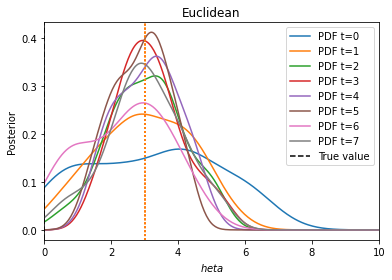

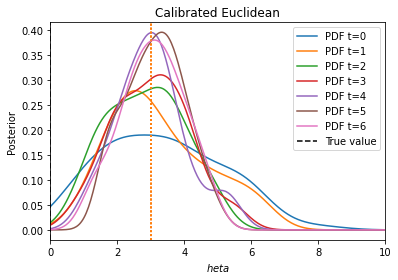

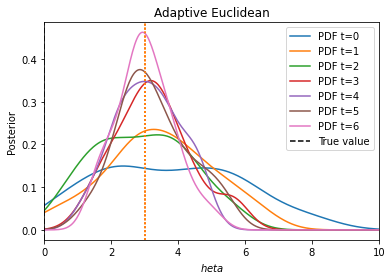

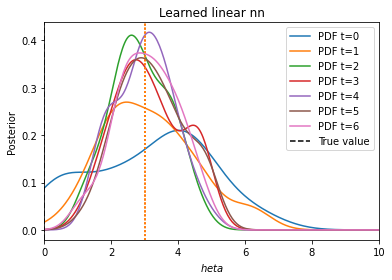

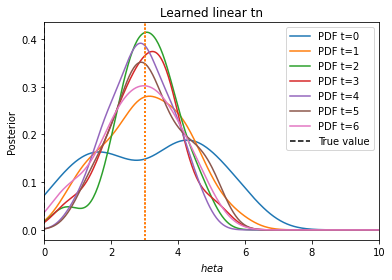

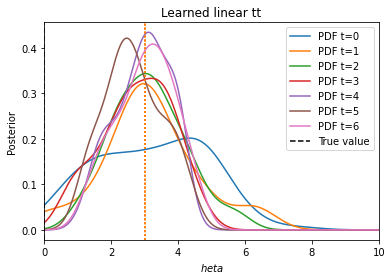

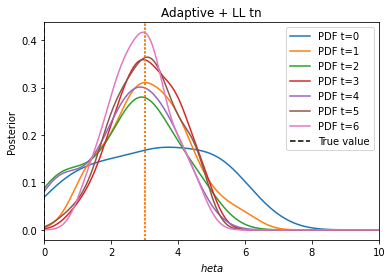

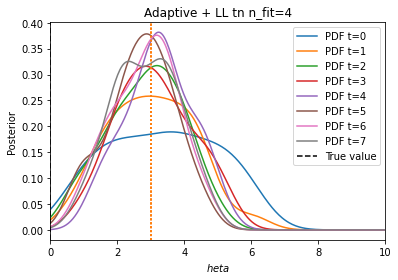

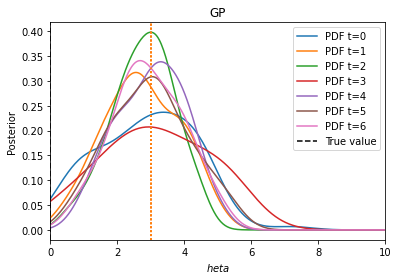

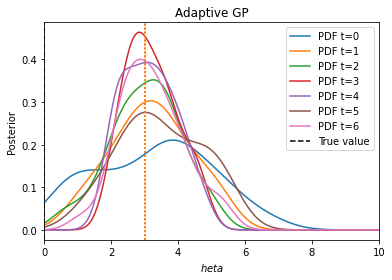

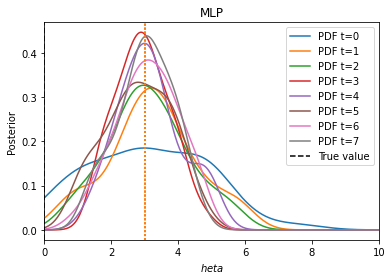

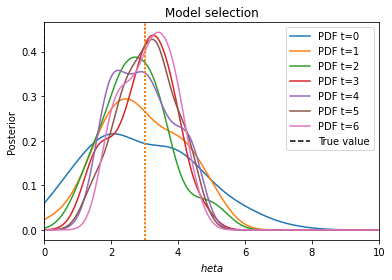

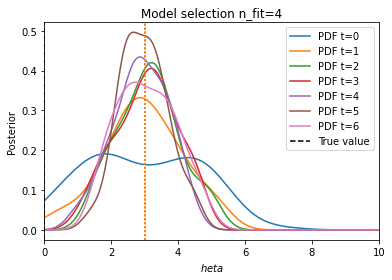

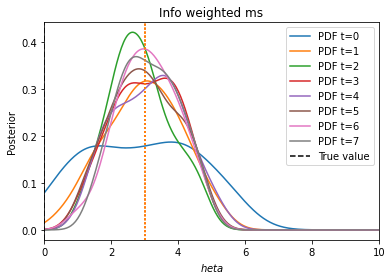

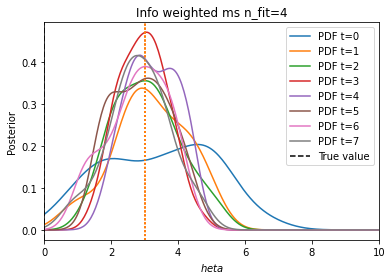

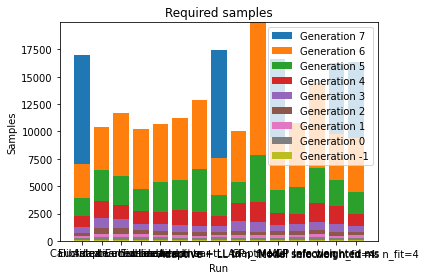

In [10]:
import matplotlib.pyplot as plt

for h, label in zip(hs, labels):
    plot_history(h, label)
pyabc.visualization.plot_sample_numbers(hs, labels)